<a href="https://colab.research.google.com/github/JakeOh/202007_itw_bd18/blob/master/lab_ml/ml01_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

머신 러닝의 일반적인 과정
* 문제 정의/파악, 큰 그림 파악
* 데이터 수집
* 데이터 탐색 - 시각화
* 데이터 준비/전처리 - NA 처리, 이상치 처리, 파생 변수, 특성 제외, 숫자형/카테고리형 데이터 변환, ...
* 머신 러닝 알고리즘 선택, 훈련(학습)
* 알고리즘 세부 튜닝 - 하이퍼 파라미터(hyper-parameter) 조정
* 시스템(애플리케이션) 상용화

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = 'https://github.com/ageron/handson-ml2/blob/master/datasets/housing/housing.csv?raw=true'

In [10]:
housing_df = pd.read_csv(file_path)

In [11]:
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [12]:
len(housing_df)  #> row의 개수(sample/example/instance의 개수)

20640

In [13]:
# 변수(컬럼, 특성)들의 데이터 타입
housing_df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [14]:
# 숫자형 데이터 요약
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [16]:
# 카테고리형 데이터 요약
housing_df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

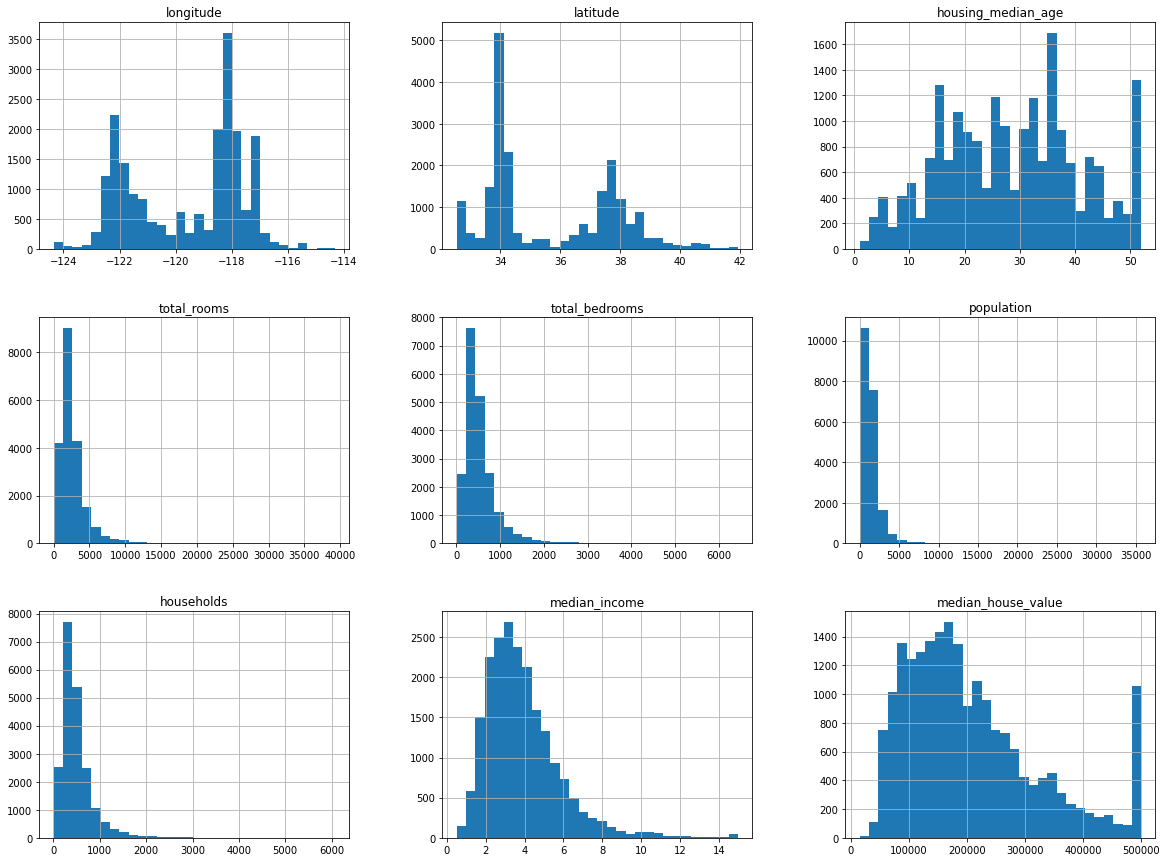

In [21]:
# 숫자형(연속형) 변수의 분포 - 히스토그램(histogram)
housing_df.hist(bins=30, figsize=(20, 15))
plt.show()

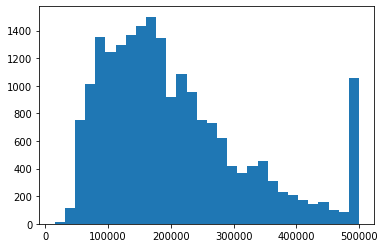

In [22]:
plt.hist(x=housing_df['median_house_value'], bins=30)
plt.show()

In [23]:
from sklearn.model_selection import train_test_split
# sklearn 패키지(폴더)의 model_selection 모듈(파일)에서 train_test_split 함수를 임포트.

In [40]:
train, test = train_test_split(housing_df,  # pandas.DataFrame, numpy.ndarray
                               test_size=0.2,   # 테스트 셋의 크기(float=비율, int=개수)
                               random_state=1)  # 난수 발생 seed

In [25]:
len(train), len(test)

(16512, 4128)

In [41]:
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
15961,-122.43,37.71,52.0,1410.0,286.0,879.0,282.0,3.1908,255600.0,NEAR BAY
1771,-122.35,37.95,42.0,1485.0,290.0,971.0,303.0,3.6094,114600.0,NEAR BAY
16414,-121.24,37.90,16.0,50.0,10.0,20.0,6.0,2.6250,137500.0,INLAND
5056,-118.35,34.02,34.0,5218.0,1576.0,3538.0,1371.0,1.5143,118800.0,<1H OCEAN
8589,-118.39,33.89,38.0,1851.0,332.0,750.0,314.0,7.3356,422700.0,<1H OCEAN


In [43]:
test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0,<1H OCEAN
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0,INLAND
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0,NEAR BAY
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0,NEAR BAY
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0,<1H OCEAN


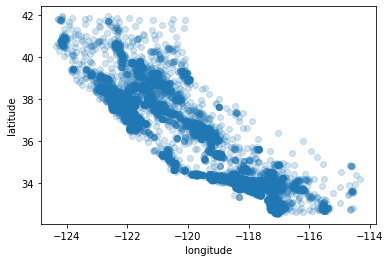

In [61]:
# longitude, latitude 시각화
plt.plot(housing_df['longitude'], housing_df['latitude'], 
         linestyle='', marker='o', alpha=0.2)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()

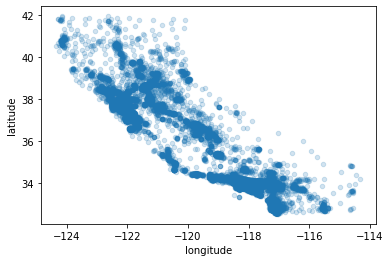

In [60]:
housing_df.plot(x='longitude', y='latitude', kind='scatter',
                alpha=0.2)
plt.show()

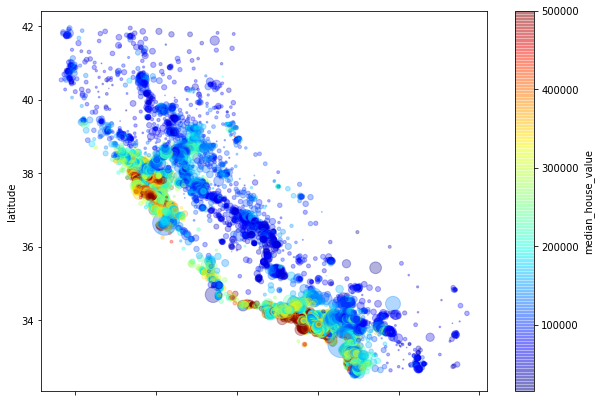

In [78]:
# longitude(x축), latitude(y축), population(점의 크기), median_house_value(점의 색깔)
housing_df.plot(x='longitude', y='latitude', kind='scatter', alpha=0.3,
                figsize=(10, 7),
                s=housing_df['population']/50,  # s(ize)
                c='median_house_value',  # c(olor)
                cmap='jet')  # cmap(color map)
plt.show()

In [79]:
# 변수들간의 상관 관계(correlation) - 피어스 상관 계수(-1 ~ 1)
corr_mat = housing_df.corr()
corr_mat

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [80]:
# median_house_value와 다른 변수(특성)들 간의 상관 계수
corr_mat['median_house_value']

longitude            -0.045967
latitude             -0.144160
housing_median_age    0.105623
total_rooms           0.134153
total_bedrooms        0.049686
population           -0.024650
households            0.065843
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64

In [82]:
corr_mat['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

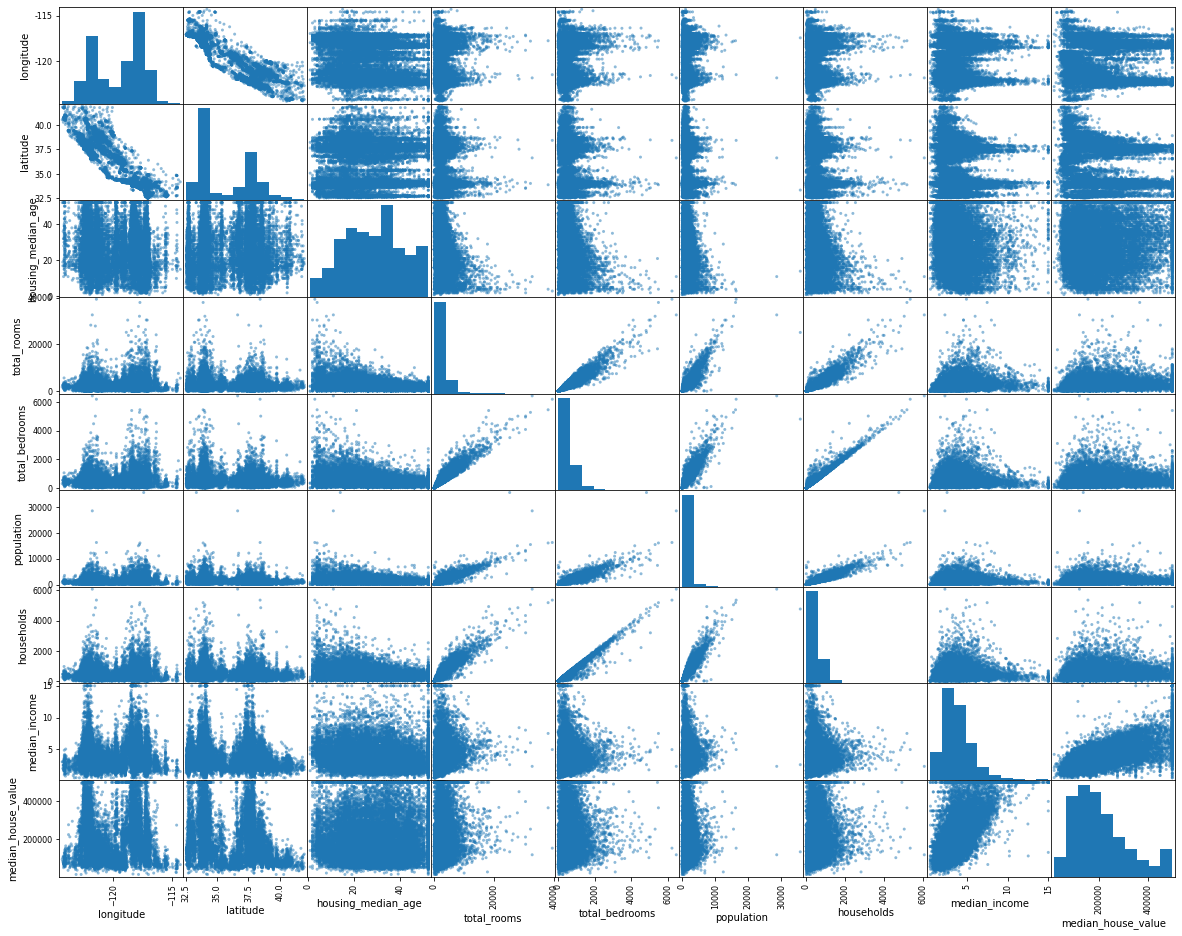

In [85]:
from pandas.plotting import scatter_matrix
scatter_matrix(housing_df, figsize=(20, 16))
plt.show()

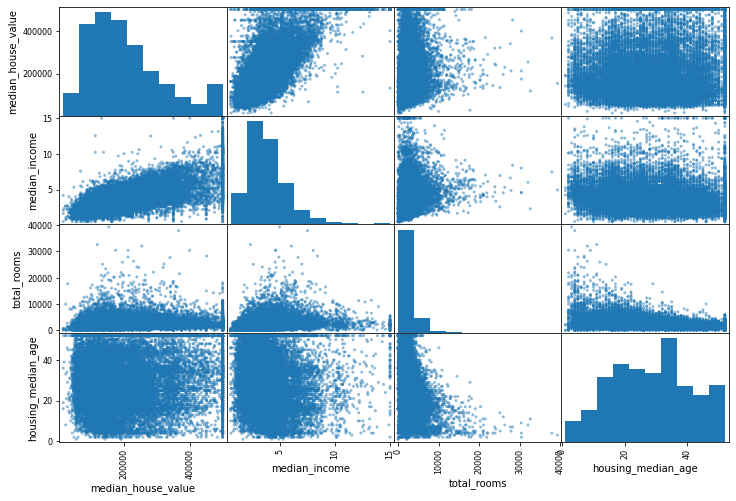

In [89]:
# 변수(컬럼)들이 많은 경우에는 몇개의 변수들만 선택해서 scatter matrix를 그려보는 게 좋음.
vars = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing_df[vars], figsize=(12, 8))
plt.show()

In [90]:
# median_income 변수가 median_house_value와 높은 상관 관계를 갖는다.
# -> 훈련 셋과 테스트 셋을 나눌 때, median_income의 분포가 유지될 수 있도록 나누는 게 좋지 않을까
# -> 계층적 분리(샘플링): StratifiedShuffleSplit 클래스 이용
# -> 계층적 분리를 하려면 카테고리 변수를 사용.

# median_income을 구간으로 나눈 카테고리 변수를 추가
housing_df['income_cat'] = pd.cut(x=housing_df['median_income'],
                                  bins=[0, 1.5, 3, 4.5, 6, np.inf],
                                  labels=[1, 2, 3, 4, 5])

In [91]:
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


In [93]:
housing_df['income_cat'].value_counts().sort_index()

1     822
2    6581
3    7236
4    3639
5    2362
Name: income_cat, dtype: int64

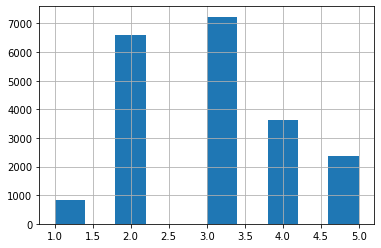

In [94]:
housing_df['income_cat'].hist()

In [95]:
housing_df['income_cat'].value_counts().sort_index() / len(housing_df)

1    0.039826
2    0.318847
3    0.350581
4    0.176308
5    0.114438
Name: income_cat, dtype: float64

In [96]:
from sklearn.model_selection import StratifiedShuffleSplit

In [98]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=1)

In [103]:
for train_indices, test_indices in split.split(X=housing_df, y=housing_df['income_cat']):
    # print(train_indices, len(train_indices))
    # print(test_indices, len(test_indices))
    strat_train_set = housing_df.loc[train_indices]
    strat_test_set = housing_df.loc[test_indices]

In [106]:
strat_train_set['income_cat'].value_counts().sort_index() / len(strat_train_set)

1    0.039850
2    0.318859
3    0.350594
4    0.176296
5    0.114402
Name: income_cat, dtype: float64

In [107]:
strat_test_set['income_cat'].value_counts().sort_index() / len(strat_test_set)

1    0.039729
2    0.318798
3    0.350533
4    0.176357
5    0.114583
Name: income_cat, dtype: float64

In [108]:
# income_cat 변수는 median_income을 카테고리화해서 train/test split을 하기 위해 임시로 사용했던 변수.
# ML 알고리즘에서는 income_cat 변수를 사용하지 않는 게 좋음.
strat_train_set.drop(labels='income_cat', 
                     axis=1,  # axis=0: row 삭제(기본값), axis=1: column 삭제
                     inplace=True)  # inplace=False: 원본 DF 유지. 새로운 DF를 리턴.(기본값)
                                    # inplace=True: 원본 DF를 변경.

In [109]:
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
740,-122.13,37.67,40.0,1748.0,318.0,914.0,317.0,3.8676,184000.0,NEAR BAY
19529,-120.98,37.65,40.0,422.0,63.0,158.0,63.0,7.3841,172200.0,INLAND
8613,-118.37,33.87,23.0,1829.0,331.0,891.0,356.0,6.5755,359900.0,<1H OCEAN
10142,-117.89,33.90,23.0,1533.0,226.0,693.0,230.0,7.8980,258200.0,<1H OCEAN
15867,-122.40,37.76,52.0,1529.0,385.0,1347.0,348.0,2.9312,239100.0,NEAR BAY


In [114]:
strat_test_set.drop(labels='income_cat', axis=1, inplace=True)

In [115]:
strat_test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
462,-122.27,37.87,35.0,3218.0,1108.0,1675.0,1000.0,1.7464,216700.0,NEAR BAY
20384,-118.94,34.18,24.0,3689.0,585.0,1898.0,581.0,5.9224,239400.0,<1H OCEAN
2140,-119.75,36.77,32.0,1962.0,399.0,1005.0,392.0,2.6726,70400.0,INLAND
8419,-118.34,33.93,32.0,1254.0,399.0,1281.0,386.0,2.2976,155700.0,<1H OCEAN
2932,-119.00,35.36,35.0,1021.0,280.0,1258.0,239.0,1.7375,48600.0,INLAND


In [117]:
# 데이터 전처리 - NA 처리. outlier 처리. 파생 변수. 카테고리 변수 처리. ...
# NA 처리: 1) NA 포함된 변수(컬럼)를 제외. 2) NA가 포함된 row를 제외. 3) NA를 다른 값으로 대체.
# NA를 중앙값 등으로 대체: 훈련 셋의 중앙값을 찾아서, 그 값으로 훈련 셋, 테스트 셋의 NA를 모두 대체.
train_median = strat_train_set['total_bedrooms'].median()
train_median

434.0

In [118]:
strat_train_set['total_bedrooms'].fillna(train_median)

740       318.0
19529      63.0
8613      331.0
10142     226.0
15867     385.0
          ...  
11207     301.0
9035     1251.0
10482    1011.0
13596      11.0
1318      780.0
Name: total_bedrooms, Length: 16512, dtype: float64